<a href="https://colab.research.google.com/github/VenkataramanSuriya/Robust-Online-Payment-Fraud-Detection/blob/main/Robust_Online_Payment_Fraud_Detection_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Robust Online Payment Fraud Detection using Machine Learning**

**Importing the Data Set**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/Online Payment Fraud Detection .csv')

In [ ]:
print(data)

       step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1         1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2         1  TRANSFER    181.00  C1305486145          181.0            0.00   
3         1  CASH_OUT    181.00   C840083671          181.0            0.00   
4         1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   
...     ...       ...       ...          ...            ...             ...   
97220    10   PAYMENT  17011.46  C1283088834            0.0            0.00   
97221    10   PAYMENT   1680.50      C671281            0.0            0.00   
97222    10   PAYMENT  26450.83   C948744009            0.0            0.00   
97223    10   PAYMENT  12171.47  C1843902873            0.0            0.00   
97224    10   PAYMENT   6733.59   C708911726            0.0            0.00   

          nameDest  oldbalanceDest  newbalanceDest 

**Plotting the All Data Points in the Data Set**

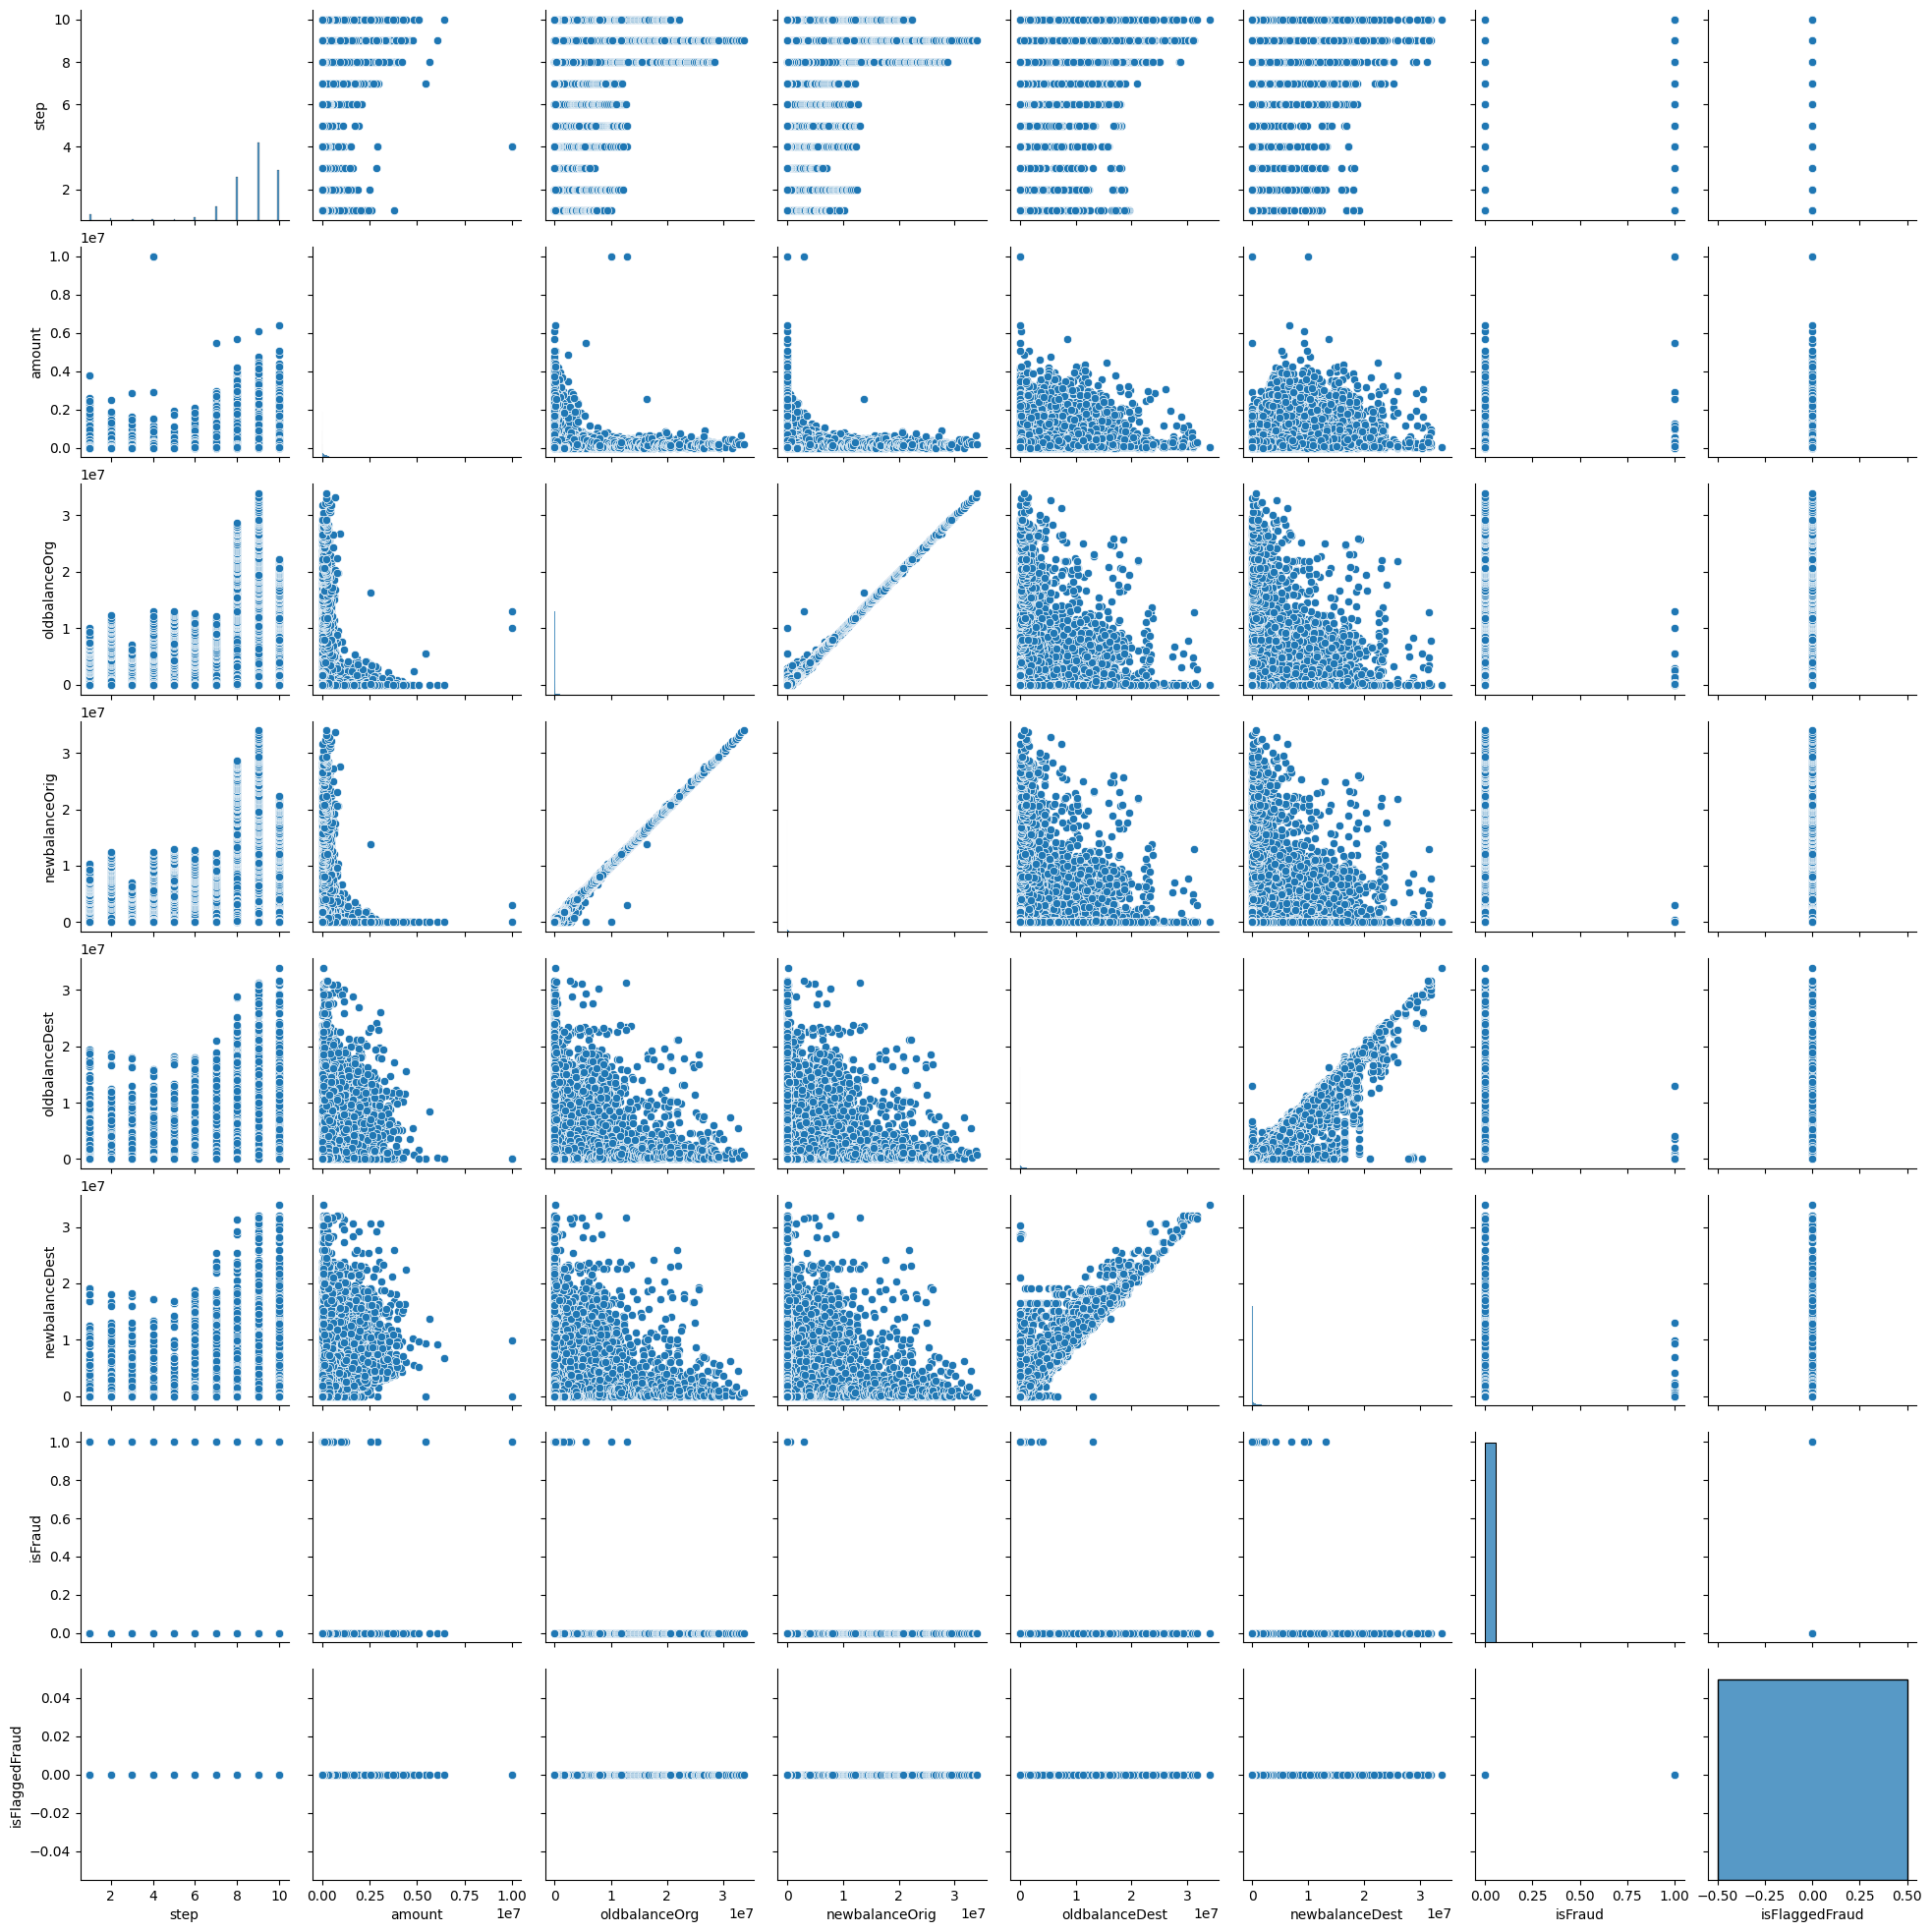

In [ ]:
sns.pairplot(data)
plt.show()

**DataSet Preprocessing**

In [ ]:
print(data.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
97220,10,PAYMENT,17011.46,C1283088834,0.0,0.0,M485693121,0.0,0.0,0.0,0.0
97221,10,PAYMENT,1680.50,C671281,0.0,0.0,M661110294,0.0,0.0,0.0,0.0
97222,10,PAYMENT,26450.83,C948744009,0.0,0.0,M1020130183,0.0,0.0,0.0,0.0
97223,10,PAYMENT,12171.47,C1843902873,0.0,0.0,M2011839805,0.0,0.0,0.0,0.0
97224,10,PAYMENT,6733.59,C708911726,0.0,0.0,M2034482538,0.0,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            97225 non-null  int64  
 1   type            97225 non-null  object 
 2   amount          97225 non-null  float64
 3   nameOrig        97225 non-null  object 
 4   oldbalanceOrg   97225 non-null  float64
 5   newbalanceOrig  97225 non-null  float64
 6   nameDest        97225 non-null  object 
 7   oldbalanceDest  97225 non-null  float64
 8   newbalanceDest  97224 non-null  float64
 9   isFraud         97224 non-null  float64
 10  isFlaggedFraud  97224 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.2+ MB


In [ ]:
data['step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
data.shape

(97225, 11)

In [ ]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
Type=data['type'].value_counts

In [ ]:
data['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C948744009',
       'C1843902873', 'C708911726'], dtype=object)

In [ ]:
data['nameDest'].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1020130183',
       'M2011839805', 'M2034482538'], dtype=object)

In [ ]:
data.dropna(axis=0, inplace = True)

In [ ]:
data.dropna(axis=1, inplace = False)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97219,10,PAYMENT,10811.91,C504389296,1009.0,0.00,M1318927100,0.0,0.0,0.0,0.0
97220,10,PAYMENT,17011.46,C1283088834,0.0,0.00,M485693121,0.0,0.0,0.0,0.0
97221,10,PAYMENT,1680.50,C671281,0.0,0.00,M661110294,0.0,0.0,0.0,0.0
97222,10,PAYMENT,26450.83,C948744009,0.0,0.00,M1020130183,0.0,0.0,0.0,0.0


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[2,4,1,5,3],inplace=True)

In [ ]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97219,10,2,10811.91,C504389296,1009.0,0.00,M1318927100,0.0,0.0,0.0,0.0
97220,10,2,17011.46,C1283088834,0.0,0.00,M485693121,0.0,0.0,0.0,0.0
97221,10,2,1680.50,C671281,0.0,0.00,M661110294,0.0,0.0,0.0,0.0
97222,10,2,26450.83,C948744009,0.0,0.00,M1020130183,0.0,0.0,0.0,0.0


**Createing a model**

In [ ]:
X = data[['type','amount','oldbalanceOrg','newbalanceOrig']]

Y = data['isFraud']

In [ ]:
Y

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
97219    0.0
97220    0.0
97221    0.0
97222    0.0
97223    0.0
Name: isFraud, Length: 97224, dtype: float64

**Spliting Data For Train And Test**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

 **Plotting the Train And Test Data**

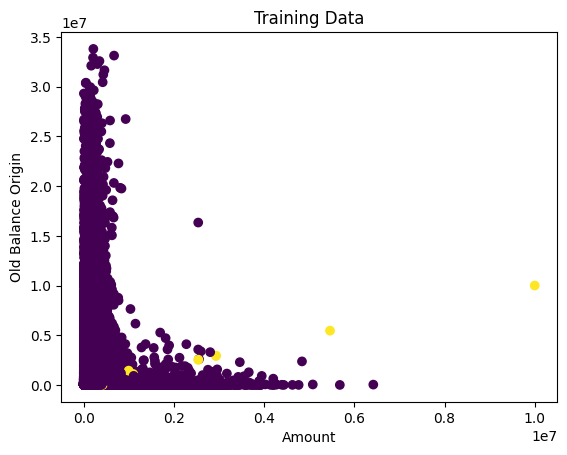

In [ ]:
plt.scatter(X_train['amount'], X_train['oldbalanceOrg'], c=Y_train, cmap='viridis')
plt.xlabel('Amount')
plt.ylabel('Old Balance Origin')
plt.title('Training Data')
plt.show()

**Training The Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on training data : ',training_data_accuracy)

Accuracy on training data :  1.0


**Ploting Training Efficiency Of Model**

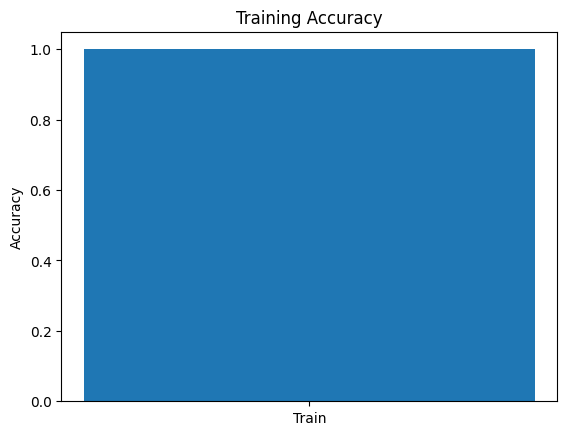

In [ ]:
plt.bar(['Train'], [training_data_accuracy])
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

**Ploting Testing Efficiency Of Model**

In [ ]:
X_test_prediction = model.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on test data : ',test_data_accuracy)

Accuracy on test data :  0.99871432244793


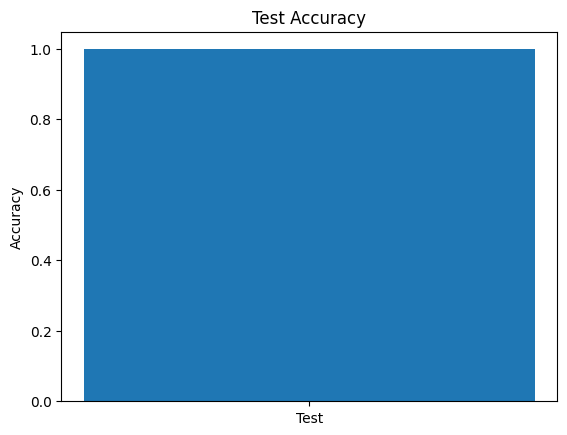

In [ ]:
plt.bar(['Test'], [test_data_accuracy])
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()


**Overall Efficiency Of The Model**

In [ ]:
overall_accuracy = accuracy_score(model.predict(X), Y)
print('Overall Accuracy: ', overall_accuracy)

Overall Accuracy:  0.999742861844812


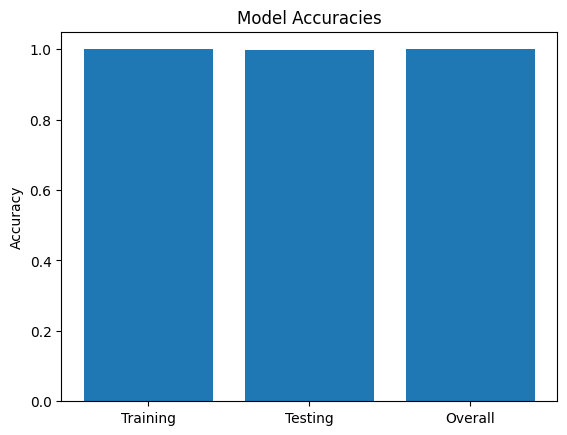

In [ ]:
accuracies = [training_data_accuracy, test_data_accuracy, overall_accuracy]
labels = ['Training', 'Testing', 'Overall']
plt.bar(labels, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()